# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.

   Dataset berasal dari https://archive.ics.uci.edu/dataset/488/facebook+live+sellers+in+thailand
   Facebook Live sellers in Thailand
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna (Dataset ini memiliki 7050 baris)..
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: status_type: Menunjukkan jenis status yang diposting (seperti: foto, video, link, status.).
     - *Numerikal*: num_reactions: Total jumlah reaksi yang diterima status,num_comments: Jumlah komentar yang diberikan, num_shares: Berapa kali status dibagikan, num_likes, num_loves, num_wows, num_hahas, num_sads, num_angrys: Jenis reaksi spesifik yang diterima.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from joblib import Parallel, delayed, dump
from tabulate import tabulate
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [70]:
# Membaca dataset CSV
df = pd.read_csv('Live_20210128.csv')
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [71]:
# Memahami Struktur Data
print("Struktur Data\n")

# Jumlah baris dan kolom
print("Jumlah baris dan kolom dalam dataset:")
print(df.shape)

# Informasi dataset
print("\nInformasi dataset:")
print(df.info())

# Jenis data di setiap kolom
print("\nJenis data di setiap kolom:")
print(df.dtypes)

# Persebaran data pada kolom numerik
print("\nPersebaran data pada kolom numerik:")
print(tabulate(df[kolom_numerik].describe(), headers='keys', tablefmt='grid'))

# Mengatur opsi tampilan pandas supaya tidak memotong output
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

Struktur Data

Jumlah baris dan kolom dalam dataset:
(7050, 16)

Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Colum


Cek Data yang Hilang

Jumlah nilai missing value setiap kolom:
status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64


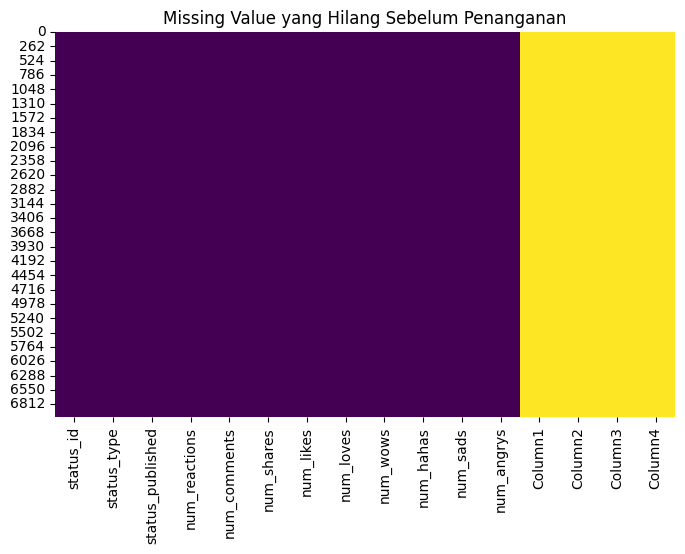

In [72]:
# Cek Data yang Hilang
print("\nCek Data yang Hilang")
print("\nJumlah nilai missing value setiap kolom:")
print(df.isnull().sum())

# Visualisasi data yang hilang
plt.figure(figsize=(8, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Value yang Hilang Sebelum Penanganan")
plt.show()

In [73]:
# Mengatasi Data yang Hilang
# Menghapus kolom yang memiliki banyak data hilang
kolom_hilang = ['Column1', 'Column2', 'Column3', 'Column4']
kolom_ada = [kolom for kolom in kolom_hilang if kolom in df.columns]
if kolom_ada:
    df = df.drop(columns=kolom_ada)

# Menghapus kolom status_id karena mengindikasikan nilai unik
if 'status_id' in df.columns:
    df = df.drop(columns=['status_id'])

# Cek hasil setelah penanganan data
print("\nHasil Penanganan Data")
print(df.info())
print("\nJumlah data yang hilang setelah penanganan:")
print(df.isnull().sum())


Hasil Penanganan Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_type       7050 non-null   object
 1   status_published  7050 non-null   object
 2   num_reactions     7050 non-null   int64 
 3   num_comments      7050 non-null   int64 
 4   num_shares        7050 non-null   int64 
 5   num_likes         7050 non-null   int64 
 6   num_loves         7050 non-null   int64 
 7   num_wows          7050 non-null   int64 
 8   num_hahas         7050 non-null   int64 
 9   num_sads          7050 non-null   int64 
 10  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(2)
memory usage: 606.0+ KB
None

Jumlah data yang hilang setelah penanganan:
status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows        

In [74]:
# Mengubah format tanggal
df['status_published'] = pd.to_datetime(df['status_published'])
print("\nHasil Pengubahan Format Tanggal")
print(df.info())


Hasil Pengubahan Format Tanggal
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   status_type       7050 non-null   object        
 1   status_published  7050 non-null   datetime64[ns]
 2   num_reactions     7050 non-null   int64         
 3   num_comments      7050 non-null   int64         
 4   num_shares        7050 non-null   int64         
 5   num_likes         7050 non-null   int64         
 6   num_loves         7050 non-null   int64         
 7   num_wows          7050 non-null   int64         
 8   num_hahas         7050 non-null   int64         
 9   num_sads          7050 non-null   int64         
 10  num_angrys        7050 non-null   int64         
dtypes: datetime64[ns](1), int64(9), object(1)
memory usage: 606.0+ KB
None



Analisis Distribusi Variabel Numerik

Statistik Deskriptif untuk Variabel Numerik:
       num_reactions  num_comments   num_shares    num_likes    num_loves     num_wows  \
count    7050.000000   7050.000000  7050.000000  7050.000000  7050.000000  7050.000000   
mean      230.117163    224.356028    40.022553   215.043121    12.728652     1.289362   
std       462.625309    889.636820   131.599965   449.472357    39.972930     8.719650   
min         0.000000      0.000000     0.000000     0.000000     0.000000     0.000000   
25%        17.000000      0.000000     0.000000    17.000000     0.000000     0.000000   
50%        59.500000      4.000000     0.000000    58.000000     0.000000     0.000000   
75%       219.000000     23.000000     4.000000   184.750000     3.000000     0.000000   
max      4710.000000  20990.000000  3424.000000  4710.000000   657.000000   278.000000   

         num_hahas     num_sads   num_angrys  
count  7050.000000  7050.000000  7050.000000  
mean      0

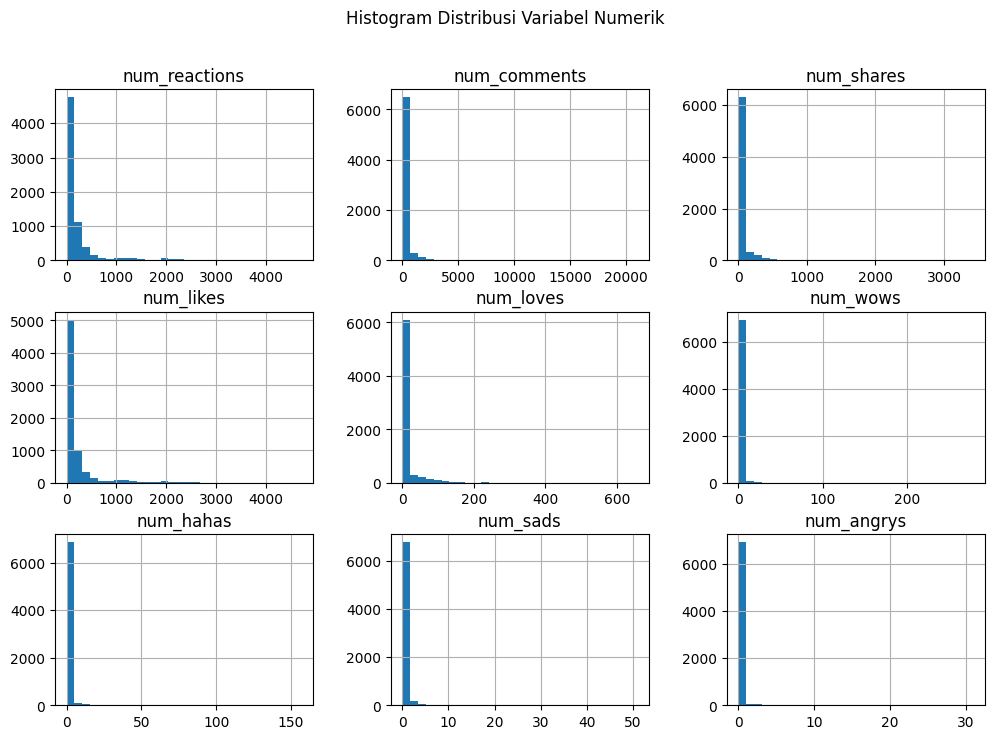


Visualisasi Distribusi Variabel Numerik (Boxplot):


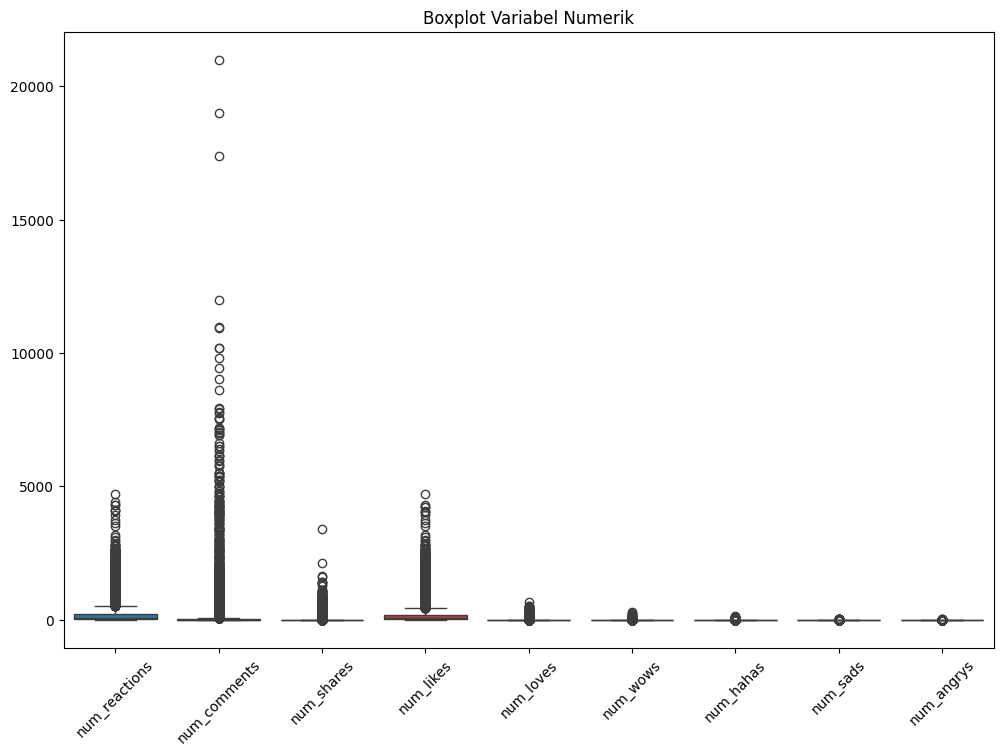


Analisis Hubungan Antar Variabel

Matriks Korelasi untuk Variabel Numerik:
               num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  num_hahas  \
num_reactions       1.000000      0.150843    0.250723   0.994923   0.305003  0.267752   0.176028   
num_comments        0.150843      1.000000    0.640637   0.101687   0.521223  0.162394   0.325048   
num_shares          0.250723      0.640637    1.000000   0.172492   0.820000  0.407628   0.399826   
num_likes           0.994923      0.101687    0.172492   1.000000   0.209308  0.207800   0.120784   
num_loves           0.305003      0.521223    0.820000   0.209308   1.000000  0.508798   0.507830   
num_wows            0.267752      0.162394    0.407628   0.207800   0.508798  1.000000   0.287756   
num_hahas           0.176028      0.325048    0.399826   0.120784   0.507830  0.287756   1.000000   
num_sads            0.075138      0.236453    0.199970   0.052169   0.207600  0.086503   0.141421   
num_angrys     

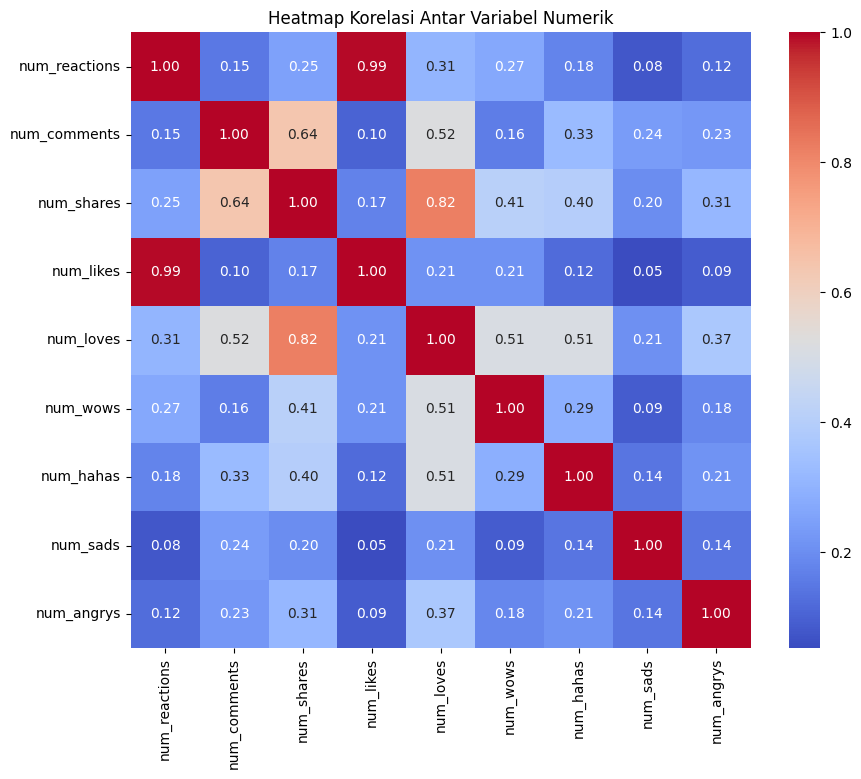


Scatter Plot untuk Hubungan Antar Variabel Numerik:


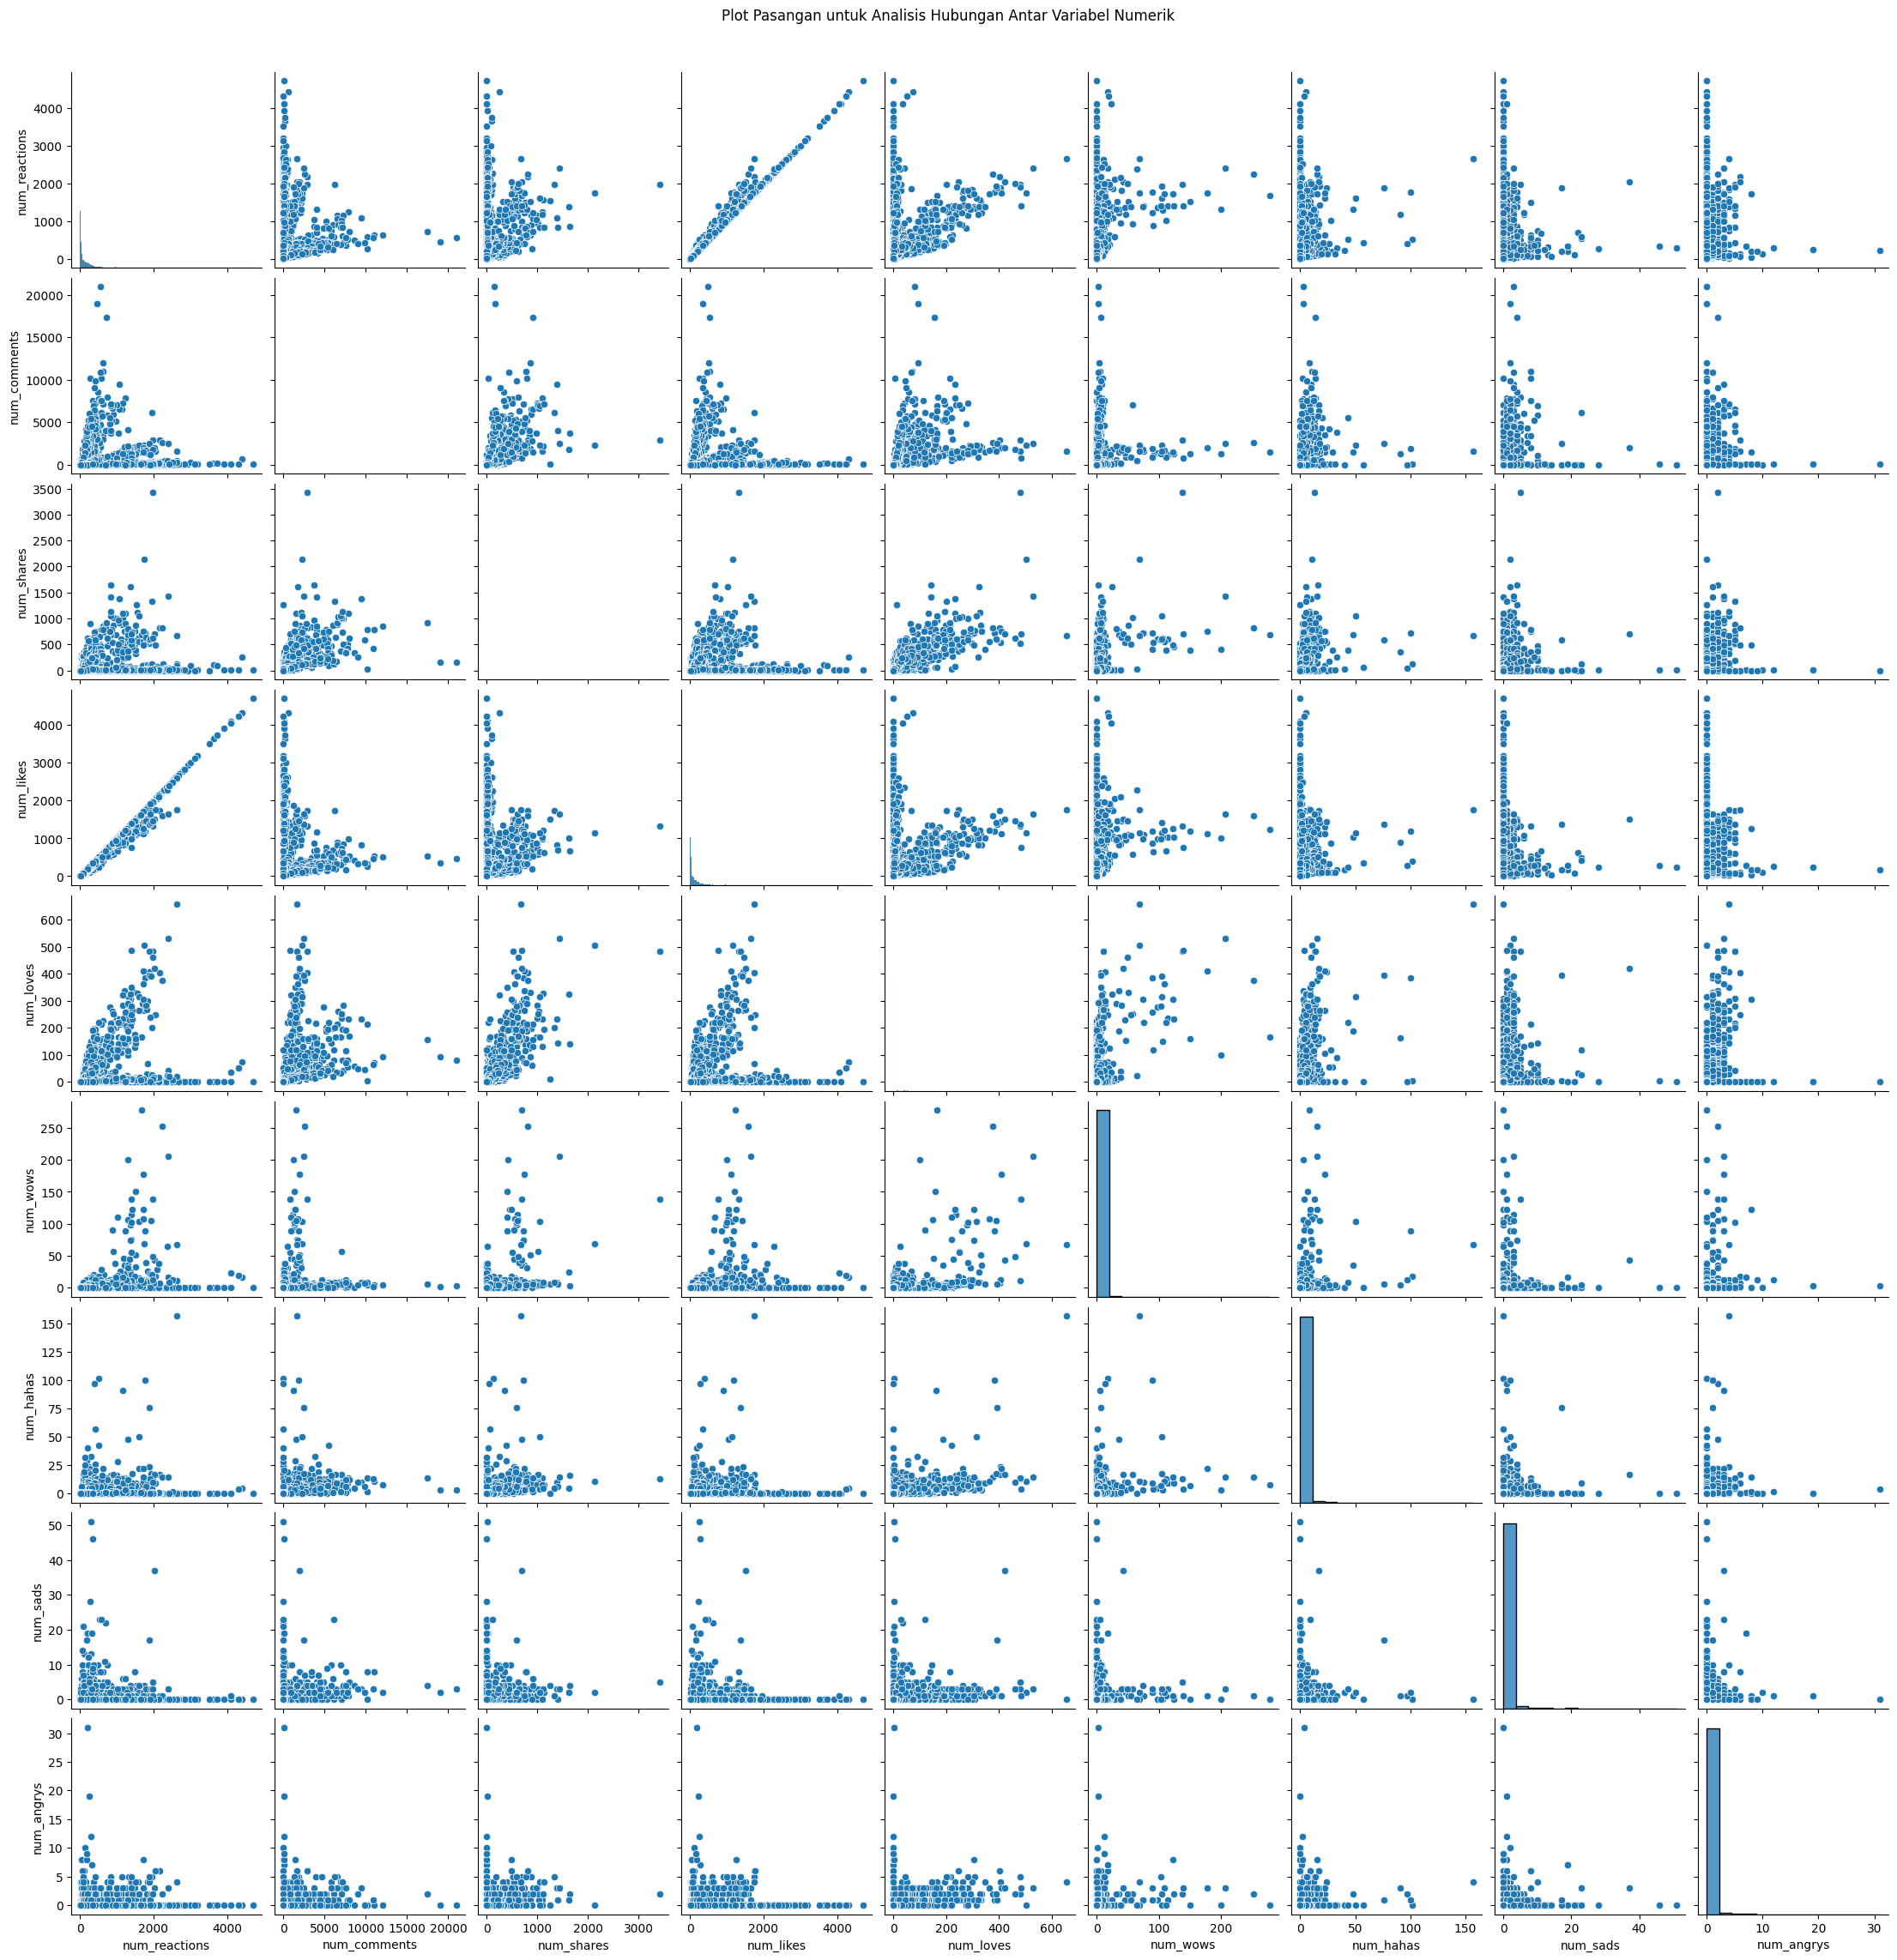

In [75]:
# Analisis Distribusi Variabel Numerik
print("\nAnalisis Distribusi Variabel Numerik")

# Pilih kolom numerik
kolom_numerik = df.select_dtypes(include=['float64', 'int64']).columns

# Statistik deskriptif
print("\nStatistik Deskriptif untuk Variabel Numerik:")
print(df[kolom_numerik].describe())

# Histogram
print("\nVisualisasi Distribusi Variabel Numerik (Histogram):")
df[kolom_numerik].hist(bins=30, figsize=(12, 8))
plt.suptitle("Histogram Distribusi Variabel Numerik")
plt.show()

# Boxplot
print("\nVisualisasi Distribusi Variabel Numerik (Boxplot):")
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[kolom_numerik])
plt.title("Boxplot Variabel Numerik")
plt.xticks(rotation=45)
plt.show()

# Analisis Hubungan Antar Variabel
print("\nAnalisis Hubungan Antar Variabel")

# Matriks korelasi
print("\nMatriks Korelasi untuk Variabel Numerik:")
matriks_korelasi = df[kolom_numerik].corr()
print(matriks_korelasi)

# Visualisasi matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(matriks_korelasi, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap Korelasi Antar Variabel Numerik")
plt.show()

# Scatter Plot
print("\nScatter Plot untuk Hubungan Antar Variabel Numerik:")
sns.pairplot(df[kolom_numerik])
plt.suptitle("Plot Pasangan untuk Analisis Hubungan Antar Variabel Numerik", y=1.02)
plt.show()


Diagram Batang untuk Kolom Kategorikal Terpilih:


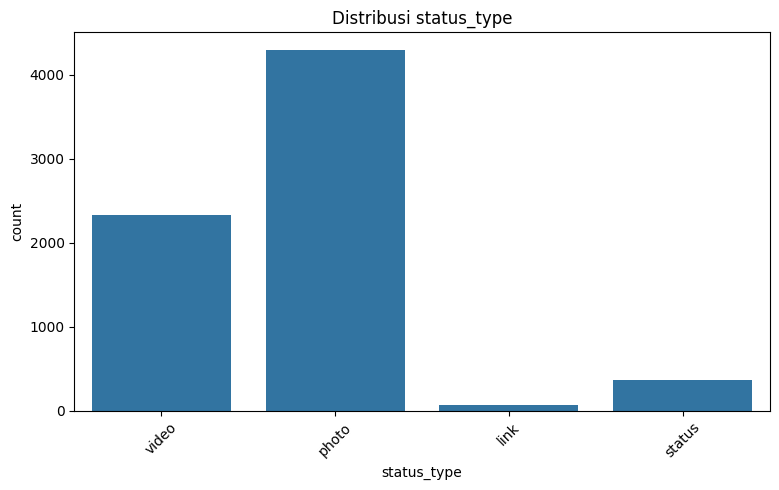

In [76]:
# Daftar kolom kategorikal yang akan divisualisasikan
categorical_cols = ['status_type']

# Hitung jumlah kolom kategorikal
n_cols = len(categorical_cols)

# Buat subplot grid
n_rows = (n_cols + 1) // 2  # Jumlah baris sama dengan jumlah kolom
fig, axes = plt.subplots(nrows=n_rows, ncols=2, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # array axes rata untuk iterasi

# Visualisasi distribusi variabel kategorikal dengan diagram batang
print("\nDiagram Batang untuk Kolom Kategorikal Terpilih:")
for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f"Distribusi {col}")
    axes[i].tick_params(axis='x', rotation=45)

# Sembunyikan subplot yang tidak digunakan
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [77]:
# Encoding Data Kategorikal menggunakan Label Encoding
print("\nEncoding Data Kategorikal")

# Inisialisasi LabelEncoder
label_encoders = {}

# Proses encoding untuk setiap kolom kategorikal
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Mengubah data kategorikal menjadi numerik
    label_encoders[col] = le  # Simpan encoder untuk nanti kalau mau inverse transform

# Satukan data numerik dan hasil encoding
data_processed = df[kolom_numerik.tolist() + categorical_cols]  # Data sekarang berisi kolom numerik + kategorikal yang telah diencode

print("\nData setelah encoding kategorikal:")
print(data_processed.head())

X = data_processed

# Cek kolom yang mengandung NaN sebelum penanganan
print("Sebelum imputasi:")
print(X.isnull().sum())

# Mengisi NaN dengan mean dari setiap kolom
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Mengonversi X_imputed kembali ke DataFrame
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)

# Cek kolom yang mengandung NaN setelah penanganan
print("\nSetelah imputasi:")
print(X_imputed_df.isnull().sum())

# Cek dan Menghapus Data Duplikat
print("\nCek Data Duplikat")
print(X_imputed_df.duplicated().sum())

print("\nMenghapus Data Duplikat")
X_imputed_df.drop_duplicates(inplace=True)
X_imputed_df.reset_index(drop=True, inplace=True)
print(f"Jumlah baris setelah menghapus duplikat: {len(X_imputed_df)}")

# Deteksi dan Penanganan Outlier
print("\nDeteksi dan Penanganan Outlier")

# Deteksi outlier menggunakan IQR
for col in kolom_numerik:
    Q1 = X_imputed_df[col].quantile(0.25)
    Q3 = X_imputed_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menangani outlier dengan mengganti nilai outlier dengan batas atas / bawah
    X_imputed_df[col] = np.where(
        (X_imputed_df[col] < lower_bound) | (X_imputed_df[col] > upper_bound),
        np.clip(X_imputed_df[col], lower_bound, upper_bound),  # Clip nilai ke batas atas atau bawah
        X_imputed_df[col]
    )

print("\nData setelah penanganan outlier:")
print(X_imputed_df[kolom_numerik].describe())

# Normalisasi atau Standarisasi Fitur
print("\nNormalisasi atau Standarisasi Fitur")

# Standarisasi (mengubah distribusi data ke mean=0 dan std=1)
scaler = StandardScaler()
X_imputed_df[kolom_numerik] = scaler.fit_transform(X_imputed_df[kolom_numerik])

print("\nData setelah standarisasi atau normalisasi:")
print(X_imputed_df[kolom_numerik].head())

# Binning (Pengelompokan Data) untuk Semua Kolom Numerik
print("\nBinning (Pengelompokan Data) untuk Semua Kolom Numerik")

# Loop melalui setiap kolom numerik dan lakukan binning
for col in kolom_numerik:
    # Binning menggunakan pd.cut
    data_processed[f'{col}_Bin'] = pd.cut(
        data_processed[col],
        bins=4, #sesuai jumlah bins
        labels=['Low', 'Medium', 'High', 'Very High']  # Label untuk setiap bin
    )

    # Tampilkan distribusi binning
    print(f"\nDistribusi binning untuk {col}:")
    print(data_processed[f'{col}_Bin'].value_counts())



Encoding Data Kategorikal

Data setelah encoding kategorikal:
   num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  num_hahas  num_sads  \
0            529           512         262        432         92         3          1         1   
1            150             0           0        150          0         0          0         0   
2            227           236          57        204         21         1          1         0   
3            111             0           0        111          0         0          0         0   
4            213             0           0        204          9         0          0         0   

   num_angrys  status_type  
0           0            3  
1           0            1  
2           0            3  
3           0            1  
4           0            1  
Sebelum imputasi:
num_reactions    0
num_comments     0
num_shares       0
num_likes        0
num_loves        0
num_wows         0
num_hahas        0
num_sads         

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

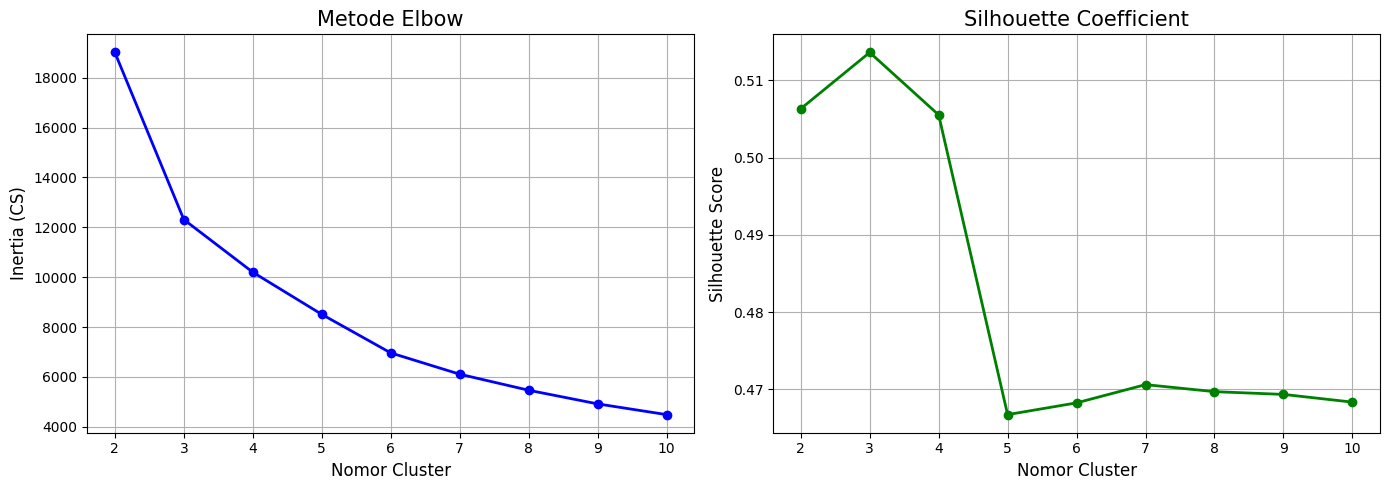

Silhouette Score untuk k=2: 0.5063
Silhouette Score untuk k=3: 0.5136
Silhouette Score untuk k=4: 0.5055
Silhouette Score untuk k=5: 0.4963
Silhouette Score untuk k=6: 0.4680
Silhouette Score untuk k=7: 0.4702
Silhouette Score untuk k=8: 0.4537
Silhouette Score untuk k=9: 0.4696
Silhouette Score untuk k=10: 0.4564


In [78]:
X = X_imputed_df
cs = []
silhouette_coefficients = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
    silhouette_coefficients.append(silhouette_score(X, kmeans.labels_))

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Metode Elbow
axes[0].plot(range(2, 11), cs, marker='o', linestyle='-', color='b', linewidth=2)
axes[0].set_title('Metode Elbow', fontsize=15)
axes[0].set_xlabel('Nomor Cluster', fontsize=12)
axes[0].set_ylabel('Inertia (CS)', fontsize=12)
axes[0].grid(True)

# Silhouette Score plot
axes[1].plot(range(2, 11), silhouette_coefficients, marker='o', linestyle='-', color='g', linewidth=2)
axes[1].set_title('Silhouette Coefficient', fontsize=15)
axes[1].set_xlabel('Nomor Cluster', fontsize=12)
axes[1].set_ylabel('Silhouette Score', fontsize=12)
axes[1].grid(True)

plt.tight_layout()
plt.show()

# Definisikan range jumlah cluster yang ingin diuji
k_range = range(2, 11)

# Inisialisasi list untuk menyimpan Silhouette Score
silhouette_scores = []

# Loop untuk menghitung Silhouette Score pada setiap jumlah cluster
for k in k_range:
    # Inisialisasi KMeans dengan jumlah cluster saat ini
    kmeans = KMeans(n_clusters=k, random_state=42)

    # Fit model dan prediksi cluster
    labels = kmeans.fit_predict(X)

    # Hitung Silhouette Score
    score = silhouette_score(X, labels)

    # Simpan score ke dalam list
    silhouette_scores.append(score)
    print(f"Silhouette Score untuk k={k}: {score:.4f}")


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

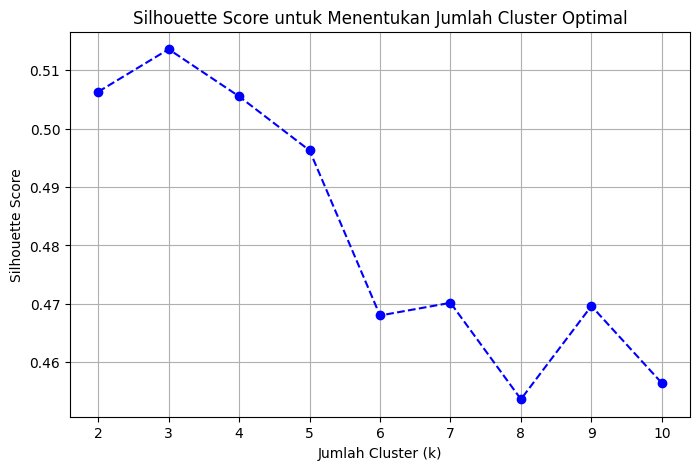


Jumlah cluster optimal berdasarkan Silhouette Score: 3

Latih Model K-Means dengan Jumlah Cluster Optimal
Evaluasi Model Sebelum Feature Selection
Silhouette Score sebelum feature selection: 0.51


In [79]:
# Plot hasil Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='--', color='b')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Menentukan Jumlah Cluster Optimal')
plt.grid(True)  # buat mudah baca, ini grid
plt.xticks(k_range)  # ini sumbu x menampilkan semua nilai k yang diuji
plt.show()

# Menampilkan jumlah cluster optimal berdasarkan Silhouette Score tertinggi
optimal_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f"\nJumlah cluster optimal berdasarkan Silhouette Score: {optimal_k}")

# Latih Model K-Means dengan Jumlah Cluster Optimal
print("\nLatih Model K-Means dengan Jumlah Cluster Optimal")

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Evaluasi Model Sebelum Feature Selection
print("Evaluasi Model Sebelum Feature Selection")

# Latih model K-Means dengan semua fitur
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
kmeans_score = silhouette_score(X, kmeans_labels)
print(f"Silhouette Score sebelum feature selection: {kmeans_score:.2f}")

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

Fitur terpilih setelah feature selection: Index(['num_reactions', 'num_comments'], dtype='object')

Evaluasi Model Setelah Feature Selection
Silhouette Score setelah feature selection: 0.70


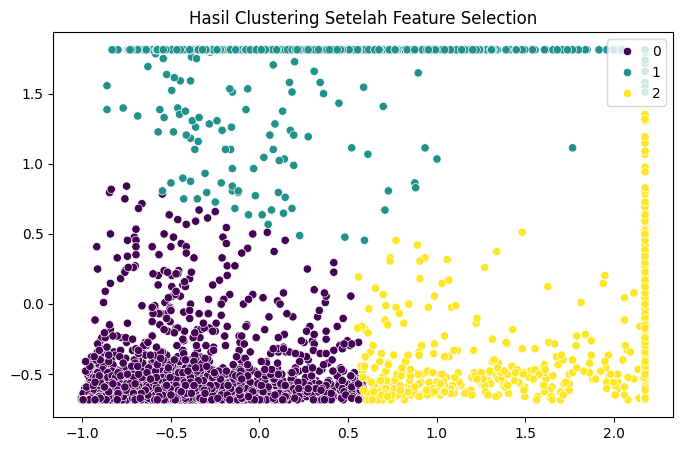


Perbandingan Performa Model
Silhouette Score sebelum feature selection: 0.51
Silhouette Score setelah feature selection: 0.70
Performa model dapat meningkatkan Feature Selection.


In [80]:
# SelectKBest untuk memilih fitur terbaik
selector = SelectKBest(score_func=mutual_info_classif, k=2)  # fitur terbaik
X_selected = selector.fit_transform(X, kmeans_labels)  # Label clustering jadi target

# Dapatkan nama fitur terpilih
selected_features = X.columns[selector.get_support()]
print("Fitur terpilih setelah feature selection:", selected_features)

# Evaluasi Model Setelah Feature Selection
print("\nEvaluasi Model Setelah Feature Selection")

# Latih model K-Means dengan fitur terpilih
kmeans_selected = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels_selected = kmeans_selected.fit_predict(X_selected)
kmeans_score_selected = silhouette_score(X_selected, kmeans_labels_selected)
print(f"Silhouette Score setelah feature selection: {kmeans_score_selected:.2f}")

plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_selected[:, 0], y=X_selected[:, 1], hue=kmeans_labels_selected, palette='viridis')
plt.title("Hasil Clustering Setelah Feature Selection")
plt.legend(loc='upper right')
plt.show()

# Bandingkan Performa Model Sebelum dan Sesudah Feature Selection
print("\nPerbandingan Performa Model")
print(f"Silhouette Score sebelum feature selection: {kmeans_score:.2f}")
print(f"Silhouette Score setelah feature selection: {kmeans_score_selected:.2f}")

if kmeans_score_selected > kmeans_score:
    print("Performa model dapat meningkatkan Feature Selection.")
else:
    print("Performa model tidak dapat ditingkatkan oleh Feature Selection.")

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

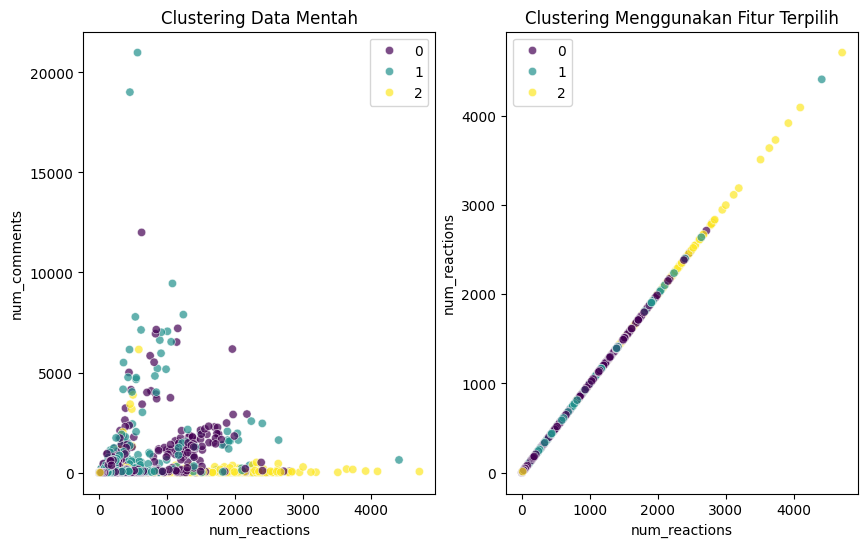

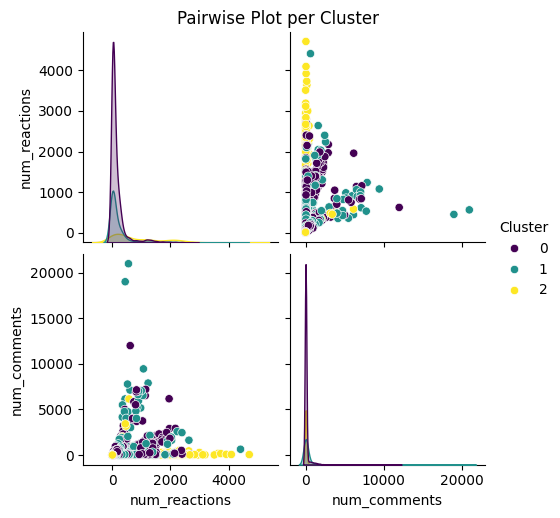

In [81]:
# Data asli tersalin serta kolom cluster ditambahkan dengan NAN
data_with_clusters = df.copy()
data_with_clusters['Cluster'] = np.nan

# Pemetaan Index
index_mapping = X_imputed_df.index

for i, label in enumerate(kmeans_labels_selected):
    # Memeriksa kalau Index ada didalam batas
    if i < len(index_mapping):
        data_with_clusters.loc[index_mapping[i], 'Cluster'] = label
    else:
        print(f"Peringatan: Index {i} di luar batas untuk pemetaan indeks")

# Hapus data yang tidak memiliki cluster (kalau masih ada)
data_with_clusters.dropna(subset=['Cluster'], inplace=True)

# Buat mudah analisis, cluster di conversi ke interger
data_with_clusters['Cluster'] = data_with_clusters['Cluster'].astype(int)

# menentukan fitur numerik
numeric_selected_features = [f for f in selected_features if f in data_with_clusters.columns and data_with_clusters[f].dtype in ['int64', 'float64']]

# Visualisasi cluster menggunakan data asli (bukan hasil standarisasi)
plt.figure(figsize=(10, 6))

# Memastikan fitur yang digunakan tersedia
feature_x = selected_features[0] if len(selected_features) > 0 else data_with_clusters.columns[0]
feature_y = selected_features[1] if len(selected_features) > 1 else data_with_clusters.columns[1]

# Gunakan data dengan cluster untuk membuat plot guna memastikan panjang yang konsisten
plt.subplot(1, 2, 1)
sns.scatterplot(x=data_with_clusters[feature_x], y=data_with_clusters[feature_y], hue=kmeans_labels_selected, palette='viridis', alpha=0.7, edgecolor='w')
plt.title("Clustering Data Mentah")

plt.subplot(1, 2, 2)
# kalau perlu, sesuaikan pilihan fitur untuk plot kedua.
feature_z = selected_features[2] if len(selected_features) > 2 else data_with_clusters.columns[2]
sns.scatterplot(x=data_with_clusters[feature_x], y=data_with_clusters[feature_z],
                hue=kmeans_labels_selected, palette='viridis', alpha=0.7, edgecolor='w')
plt.title("Clustering Menggunakan Fitur Terpilih")
plt.show()

# Visualisasi extra
numeric_selected_features = [f for f in selected_features if data_with_clusters[f].dtype in ['int64', 'float64']]
sns.pairplot(data_with_clusters, hue='Cluster', palette='viridis', vars=numeric_selected_features)
plt.suptitle('Pairwise Plot per Cluster', y=1.02)
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

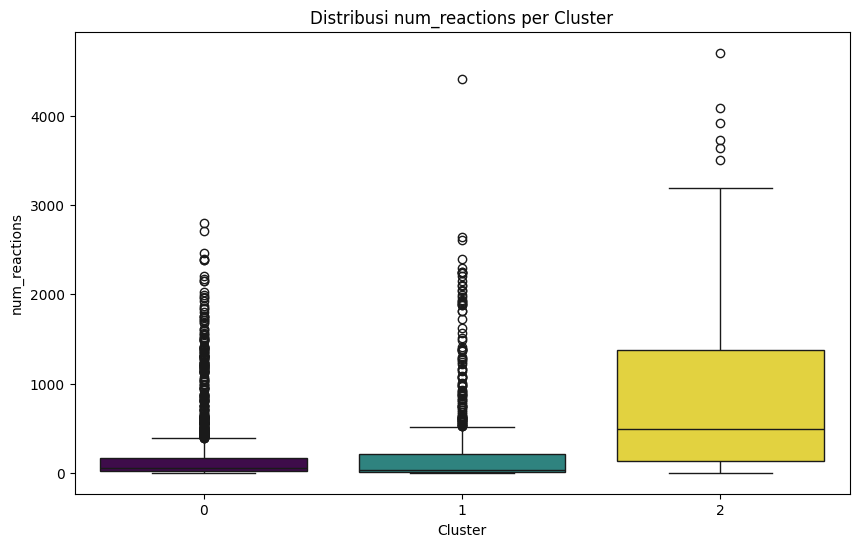

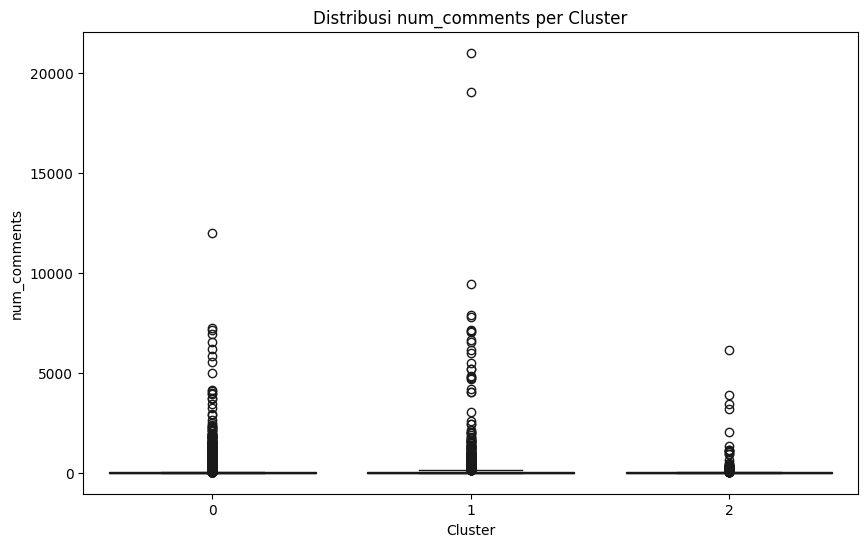


Analisis Karakteristik Cluster

Cluster 0:
num_reactions    154.86
num_comments     103.69
dtype: float64

Cluster 1:
num_reactions    185.00
num_comments     265.22
dtype: float64

Cluster 2:
num_reactions    847.06
num_comments      61.54
dtype: float64

Jumlah data per cluster:
Cluster
0    3078
1    1168
2     741
Name: count, dtype: int64

Rata-rata nilai fitur per cluster:
         num_reactions  num_comments
Cluster                             
0               154.86        103.69
1               185.00        265.22
2               847.06         61.54

Analisis Karakteristik Cluster (K-Means):

Cluster 0:
num_reactions    154.860299
num_comments     103.694282
dtype: float64

Cluster 1:
num_reactions    185.000856
num_comments     265.220034
dtype: float64

Cluster 2:
num_reactions    847.063428
num_comments      61.543860
dtype: float64

Interpretasi Hasil Clustering

Karakteristik Cluster 0:
- Rata-rata num_reactions: 154.86
- Rata-rata num_comments: 103.69
- Rata-rata juml

In [82]:
# Visualisasi distribusi fitur numerik dalam tiap cluster
for feature in numeric_selected_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=feature, data=data_with_clusters, hue='Cluster', palette='viridis', legend=False)
    plt.title(f'Distribusi {feature} per Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.show()

# Analisis karakteristik cluster
print("\nAnalisis Karakteristik Cluster")
for cluster in range(optimal_k):
    print(f"\nCluster {cluster}:")
    cluster_data = data_with_clusters[data_with_clusters['Cluster'] == cluster]
    print(cluster_data[numeric_selected_features].mean().round(2))

# Analisis ukuran cluster
cluster_sizes = data_with_clusters['Cluster'].value_counts().sort_index()
print("\nJumlah data per cluster:")
print(cluster_sizes)

# Analisis statistik deskriptif per cluster
cluster_stats = data_with_clusters.groupby('Cluster')[numeric_selected_features].mean().round(2)
print("\nRata-rata nilai fitur per cluster:")
print(cluster_stats)

# Analisis untuk K-Means
print("\nAnalisis Karakteristik Cluster (K-Means):")
for cluster in range(optimal_k):
    print(f"\nCluster {cluster}:")
    cluster_data = data_with_clusters[data_with_clusters['Cluster'] == cluster]
    print(cluster_data[numeric_selected_features].mean())

# ada hubungannya dengan bisnis
print("\nInterpretasi Hasil Clustering")
for cluster in cluster_stats.index:
    print(f"\nKarakteristik Cluster {cluster}:")
    for feature in numeric_selected_features:
        print(f"- Rata-rata {feature}: {cluster_stats.loc[cluster, feature]:.2f}")

    # Hubungkan dengan interpretasi nyata (kalau gk salah, fitur yang dipakai ada di dataset)
    if 'num_comments' in numeric_selected_features:
        # Menentukan tingkatan jumlah komentar berdasarkan kuantil
        comment_quantiles = data_with_clusters['num_comments'].quantile([0.33, 0.66])

        if cluster_stats.loc[cluster, 'num_comments'] > comment_quantiles[0.66]:
            comment_level = 'Tinggi'
        elif cluster_stats.loc[cluster, 'num_comments'] > comment_quantiles[0.33]:
            comment_level = 'Sedang'
        else:
            comment_level = 'Rendah'

        comment_info = f"- Rata-rata jumlah komentar: {comment_level}"
        print(comment_info)

    if 'num_reactions' in numeric_selected_features:
        # Menentukan tingkatan engagement berdasarkan kuantil
        reaction_quantiles = data_with_clusters['num_reactions'].quantile([0.33, 0.66])

        if cluster_stats.loc[cluster, 'num_reactions'] > reaction_quantiles[0.66]:
            reaction_level = 'Tinggi'
        elif cluster_stats.loc[cluster, 'num_reactions'] > reaction_quantiles[0.33]:
            reaction_level = 'Sedang'
        else:
            reaction_level = 'Rendah'

        reaction_info = f"- Engagement rata-rata: {reaction_level}"
        print(reaction_info)

    print(f"- Jumlah data: {cluster_sizes[cluster]} data")

# Interpretasi Cluster

**Cluster 0: Engagement Stabil dengan Komentar Relatif Tinggi**

- Karakteristik:
  1. Rata-rata num_reactions: 154.86
  2. Rata-rata num_comments: 103.69
  3. Jumlah data: 3078
  4. Pola engagement:
    - Banyak komentar dibandingkan dengan jumlah reaksi.
    - Audiens cenderung memberikan komentar, tetapi tidak terlalu banyak memberikan reaksi seperti likes atau loves.
    - Konten dalam kelompok ini tampaknya cukup menarik untuk dibicarakan, tetapi kurang menarik secara emosional untuk mendapatkan banyak reaksi.

- Interpretasi Bisnis: Cluster konten ini menunjukkan bahwa audiens tertarik dengan isi konten dan merasa perlu memberikan komentar atau pendapat, meskipun tidak banyak mendapatkan tanggapan dalam bentuk likes atau loves.

- Rekomendasi Bisnis:

   1. Perkuat interaksi dengan audiens:

  - Untuk menarik komentar, gunakan pertanyaan terbuka atau ajakan diskusi yang lebih jelas tentang topik.
  - Untuk mempertahankan percakapan dan meningkatkan keterlibatan, jawab komentar dengan cepat.
  
  2. Tingkatkan aspek visual atau cerita:

    - Untuk menarik lebih banyak reaksi, jika memungkinkan, masukkan elemen visual seperti gambar atau video.

    - Untuk meningkatkan jumlah likes, coba format konten yang lebih emosional atau persuasif.


**Cluster 1: Engagement Tinggi dengan Dominasi Komentar**

- Karakteristik:

  1. Rata-rata num_reactions: 185.00
  2. Rata-rata num_comments: 265.22
  3. Jumlah data: 1168
  4. Pola engagement:
    - Dibandingkan dengan dua cluster lainnya, jumlah komentar sangat tinggi.
    - Audiens lebih cenderung berpartisipasi dalam diskusi dan berinteraksi dengan konten.
    - Konten ini tampaknya dapat menarik pendapat, diskusi, atau partisipasi aktif dari audiens.

- Interpretasi Bisnis:
Konten dalam cluster ini mendapatkan perhatian yang cukup besar dari audiens, terutama dalam bentuk komentar. Hal ini bisa disebabkan oleh konten yang memancing diskusi, kontroversial, atau memiliki elemen interaktif yang kuat.

- Rekomendasi Bisnis:
  1. Fokus pada strategi yang mempertahankan tingkat komentar tinggi:

    - Mendorong audiens untuk berbagi pengalaman dengan konten yang lebih interaktif, seperti polling, pertanyaan terbuka, atau tantangan.
    - Manfaatkan konten yang dibuat oleh pengguna dengan mengajak audiens untuk berbagi cerita atau pendapat.

  2. Mengubah sebagian interaksi menjadi tindakan:

  - Gunakan ajakan bertindak (call-to-action) yang lebih jelas dalam konten
   jika tujuan bisnis adalah meningkatkan konversi, seperti penjualan, pendaftaran, atau partisipasi dalam acara. Misalnya, setelah mendapatkan banyak komentar, ajak audiens untuk melakukan langkah selanjutnya, seperti mengunjungi situs web atau mendaftar untuk layanan.

  
**Cluster 2: Meskipun Banyak Respon, Sedikit Komentar**

- Karakteristik:

    1. Rata-rata num_reactions: 847.06
    2. Rata-rata num_comments: 61.54
    3. Jumlah data: 741
    4. Pola engagement:
      - Dibandingkan dengan dua cluster lainnya, cluster ini menerima jumlah reaksi tertinggi, tetapi menerima jumlah komentar paling sedikit.
      - Audiens lebih banyak memberikan respons pasif, seperti suka, cinta, atau wow, tetapi tidak terlalu terlibat dalam diskusi.
      - Konten dalam cluster ini mungkin sangat menarik secara visual atau emosional, tetapi tidak cukup untuk memicu percakapan.


- Interpretasi Bisnis: Konten dalam cluster ini berhasil menarik perhatian audiens, tetapi hanya dalam bentuk reaksi, bukan komentar. Hal ini bisa terjadi jika kontennya berupa sesuatu yang mudah dipahami secara sekilas (one-shot content), seperti gambar menarik, meme, atau konten inspiratif.

- Rekomendasi Bisnis:
  1. Tingkatkan interaksi aktif:

    - Untuk menarik audiens untuk meninggalkan komentar, gunakan ajakan untuk bertanya dalam deskripsi atau caption. contohnya, tambahkan pertanyaan seperti "Apakah kamu pernah mengalami hal seperti ini?"  Beri tahu saya di kolom komentar!


  2. Gunakan kombinasi visual yang kuat dan cerita:

 - Pertimbangkan untuk menambahkan teks yang lebih menarik atau memberikan konteks cerita yang mendorong diskusi jika kontennya berbasis gambar.
 - Untuk meningkatkan interaksi yang lebih mendalam, gunakan format konten carousel atau video pendek jika memungkinkan.


**Kesimpulan**

Hasil clustering menunjukkan bahwa, meskipun ketiga kelompok menunjukkan tingkat partisipasi yang tinggi, masing-masing kelompok memiliki format konten dan cara audiens berinteraksi dengannya.

Meskipun tidak memiliki banyak reaksi, Cluster 0 memiliki tingkat diskusi yang cukup tinggi.
- Strategi: Menambah elemen visual untuk mendorong diskusi.

Cluster 1 memiliki tingkat partisipasi komentar tertinggi, yang menunjukkan bahwa kontennya sangat memancing diskusi.
- Strategi: Gunakan format interaktif dan arahkan kritik ke tindakan nyata.

Meskipun memiliki jumlah reaksi tertinggi, Cluster 2 memiliki jumlah komentar terkecil.
- Strategi: Tingkatkan interaksi aktif dengan pertanyaan atau ajakan untuk berkomentar.



# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [83]:
data_with_clusters = X.copy()  # Salin dari data asli
data_with_clusters['Cluster'] = kmeans_labels_selected  # nambah kolom cluster

data_with_clusters.to_csv('Dataset_clustering.csv', index=False)
print("Data hasil clustering telah disimpan ke 'Dataset_clustering.csv'.")

Data hasil clustering telah disimpan ke 'Dataset_clustering.csv'.
